# Binning Time Series


## Re-Engineering Raw Crime Data
Previously, we created a crime counts dataset from the Baltimore Crime Data that allowed us to create a high-level summary of how many of which types of crimes occur on a given day.
This was great for basic time series visualization, but we lost most of the nuance/detail that we originally had.
Let's revisit the original crime data and perform some feature engineering for EDA purposes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [4]:
pd.set_option('display.max_columns',100)

In [8]:
df = pd.read_csv('/Users/danielbarella/Downloads/Part_1_Crime_Data.csv',
                 low_memory=False, parse_dates=['CrimeDateTime'])
## Converting crimedatetime and coercing errors
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'],errors='coerce')
df = df.dropna(subset=['CrimeDateTime'])
## setting and sorting the index
df = df.set_index("CrimeDateTime")
df = df.sort_index()
df.head(3)

,RowID,CCNO,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:00+00:00,556023,22F05949,3AO,3700 LEVERTON AVE,ROBBERY,Inside,PERSONAL_WEAPONS,223,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,Baltimore Highlands,0.000000,0.000000,"(0,0)",STREET,1
1922-06-22 13:00:00+00:00,556005,22F07001,4E,1100 LIGHT ST,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,942,M,58.0,WHITE,NaN,SOUTHERN,Federal Hill,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",STREET,1
1963-10-30 00:00:00+00:00,556004,17K02992,2A,3100 FERNDALE AVE,RAPE,I,OTHER,622,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,HOWARD PARK,39.327591,-76.703216,"(39.3275908337086,-76.7032163534707)",ROW/TOWNHOUSE-OCC,1


In [9]:
## baltimore is in eastern time zone,but can just use tz-naive index by choosing None
df = df.tz_convert(None)
df.head(3)

,RowID,CCNO,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:00,556023,22F05949,3AO,3700 LEVERTON AVE,ROBBERY,Inside,PERSONAL_WEAPONS,223,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,Baltimore Highlands,0.000000,0.000000,"(0,0)",STREET,1
1922-06-22 13:00:00,556005,22F07001,4E,1100 LIGHT ST,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,942,M,58.0,WHITE,NaN,SOUTHERN,Federal Hill,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",STREET,1
1963-10-30 00:00:00,556004,17K02992,2A,3100 FERNDALE AVE,RAPE,I,OTHER,622,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,HOWARD PARK,39.327591,-76.703216,"(39.3275908337086,-76.7032163534707)",ROW/TOWNHOUSE-OCC,1


Now, we will drop the columns that we will not need for our analysis:



In [10]:
## Drop extra columns not needed
drop_cols = ['CCNO','RowID','Post','GeoLocation',
            'Location','Premise']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 558343 entries, 1920-06-18 01:30:00 to 2023-03-25 23:20:00
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeCode        558343 non-null  object 
 1   Description      558343 non-null  object 
 2   Inside_Outside   468412 non-null  object 
 3   Weapon           124658 non-null  object 
 4   Gender           468088 non-null  object 
 5   Age              445937 non-null  float64
 6   Race             547171 non-null  object 
 7   Ethnicity        21183 non-null   object 
 8   District         544332 non-null  object 
 9   Neighborhood     544200 non-null  object 
 10  Latitude         557432 non-null  float64
 11  Longitude        557432 non-null  float64
 12  Total_Incidents  558343 non-null  int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 59.6+ MB


## Feature Engineering & Initial EDA
### Datetime components
Remember that date time objects in Python (and datetime indices in Pandas) contain methods and attributes for extracting specific pieces/components of the time series.
Let's save many individual pieces of our datetime column as separate features for EDA.
Let's separate out the date (without time) as its own column:

In [11]:
## saving just the date (no time) as a column
df['Date'] = df.index.date
# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,Total_Incidents,Date
CrimeDateTime,,,,,,,,,,,,,,
1920-06-18 01:30:00,3AO,ROBBERY,Inside,PERSONAL_WEAPONS,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,Baltimore Highlands,0.000000,0.000000,1,1920-06-18
1922-06-22 13:00:00,4E,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,M,58.0,WHITE,NaN,SOUTHERN,Federal Hill,39.276740,-76.612378,1,1922-06-22
1963-10-30 00:00:00,2A,RAPE,I,OTHER,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,HOWARD PARK,39.327591,-76.703216,1,1963-10-30


## Year
Now let's create a column with just the year.

In [12]:
## Engineering Features using components of the date/time
df['Year']  = df.index.year

The most efficient way to explore the data is with a visual, so let's see how many crimes were documented each year with Seaborn's countplot.

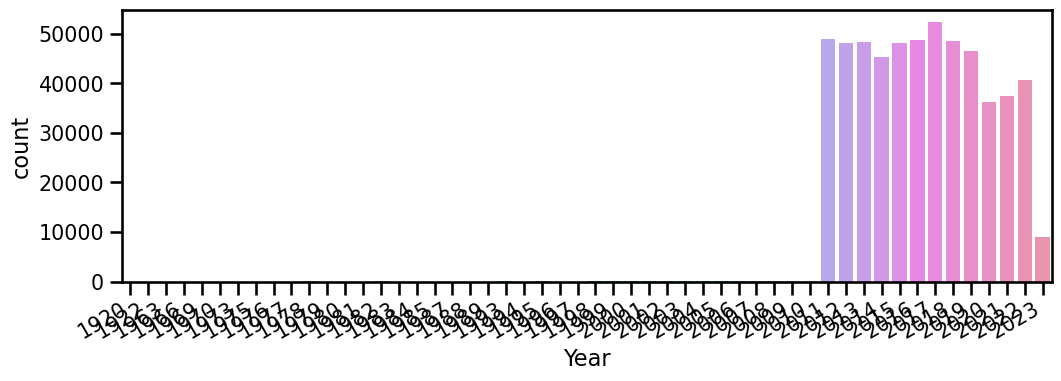

In [13]:
## Visualize years
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

Wow! There are crimes documented from way back in the 1920s, but it looks like the consistent documentation in this dataset didn't start until more recently. We can check out the value counts to confirm:

In [14]:
df['Year'].value_counts().sort_index(ascending = False).head(15)


2023     8972
2022    40639
2021    37379
2020    36284
2019    46604
2018    48599
2017    52297
2016    48673
2015    48072
2014    45228
2013    48330
2012    48142
2011    48965
2010       27
2009       15
Name: Year, dtype: int64

Based on our dataset, let's only keep data from 2011 until the present:



In [15]:
## keeping data from yr 2011 to present
df = df.loc['2011':].copy()

Let's make another visual with only the more recent years included:



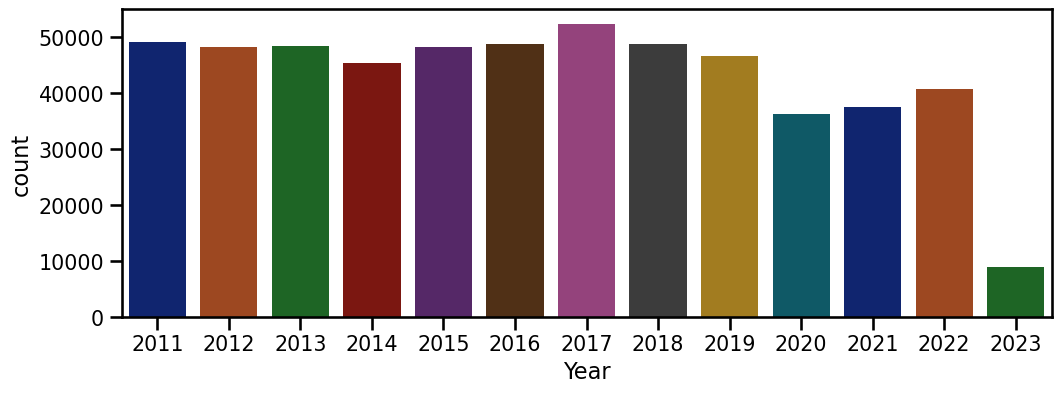

In [16]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

This gives us a much better representation of crimes by year. Let's save the year count data:



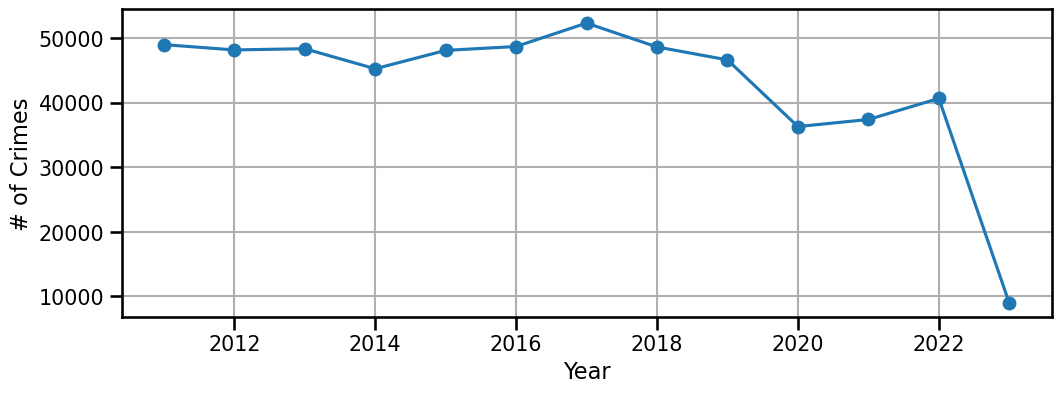

In [17]:
## save year counts
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

As we can see above, it looks like overall total crime has decreased since the pandemic start in late 2019. (Keep in mind data was not completed for 2022 at the time this was produced)
## Month
Next, we want to see which months have higher or lower crime. As we did with year, we can pull out just the month from our Datetime and create a new column. We will also create a column with the name of the month. Having both will allow us to sort by the number to keep our months in order, and to display the name in our visuals.

In [18]:
## Extracting the Month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year,Month,MonthName
CrimeDateTime,,,,,,,,,,,,,,,,,
2011-01-01,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,HARLEM PARK,39.298868,-76.639339,1,2011-01-01,2011,1,January
2011-01-01,6G,LARCENY,I,NaN,F,26.0,WHITE,NaN,SOUTHERN,FEDERAL HILL,39.277032,-76.613387,1,2011-01-01,2011,1,January
2011-01-01,6E,LARCENY,O,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,MOSHER,39.295730,-76.661589,1,2011-01-01,2011,1,January


We will now create a dictionary to match the number of the month with the name. This will allow us to keep our months in order by number:

In [19]:
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

Now, let's make a countplot by month:



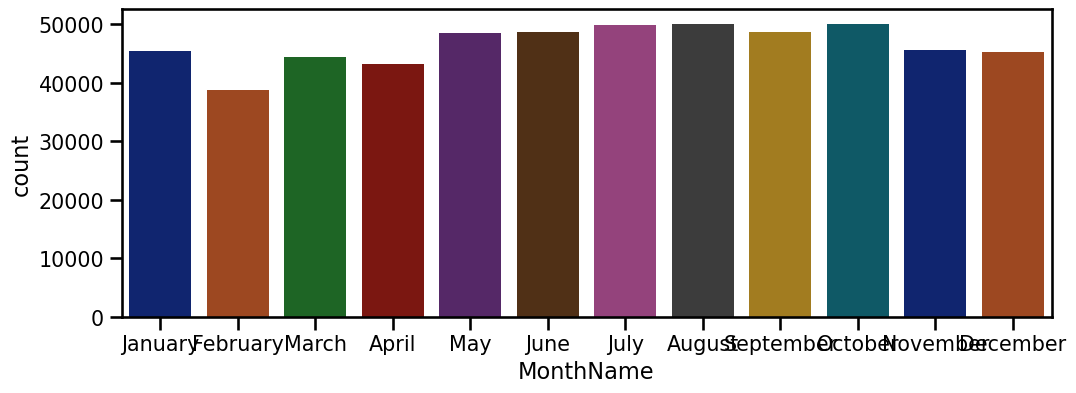

In [20]:
sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());


Now, let's save our crime count by months:



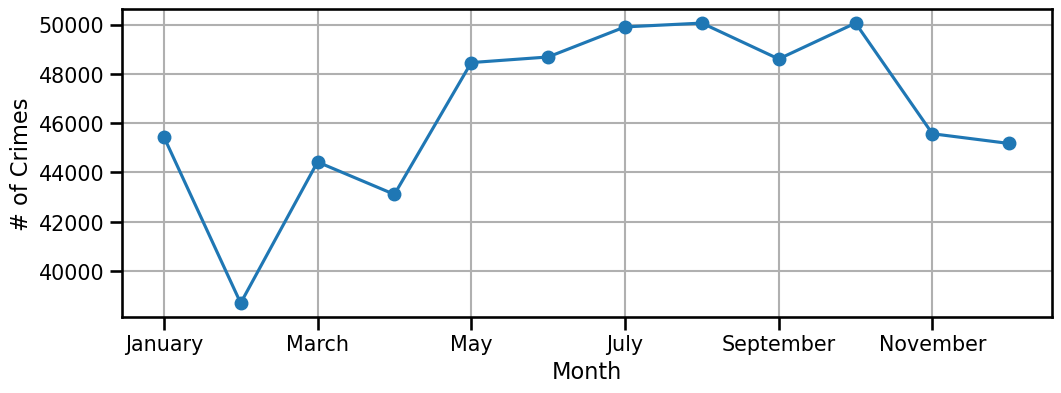

In [21]:
## save month counts
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

As we can see above, it looks like the coldest months of the year have the fewest overall # of crimes.
## Day of Week
We can break down the crimes by day of the week in much the same way as we did with months. Again, we will create a column for both number of the day and name of the day:

In [22]:
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year,Month,MonthName,DayOfWeek,DayNum
CrimeDateTime,,,,,,,,,,,,,,,,,,,
2011-01-01,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,HARLEM PARK,39.298868,-76.639339,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,6G,LARCENY,I,NaN,F,26.0,WHITE,NaN,SOUTHERN,FEDERAL HILL,39.277032,-76.613387,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,6E,LARCENY,O,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,MOSHER,39.295730,-76.661589,1,2011-01-01,2011,1,January,Saturday,5


Again, we will create a dictionary to match the number and the name:


In [23]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

When datetime's day_of_week, the numbering starts on Monday, where Monday=0.


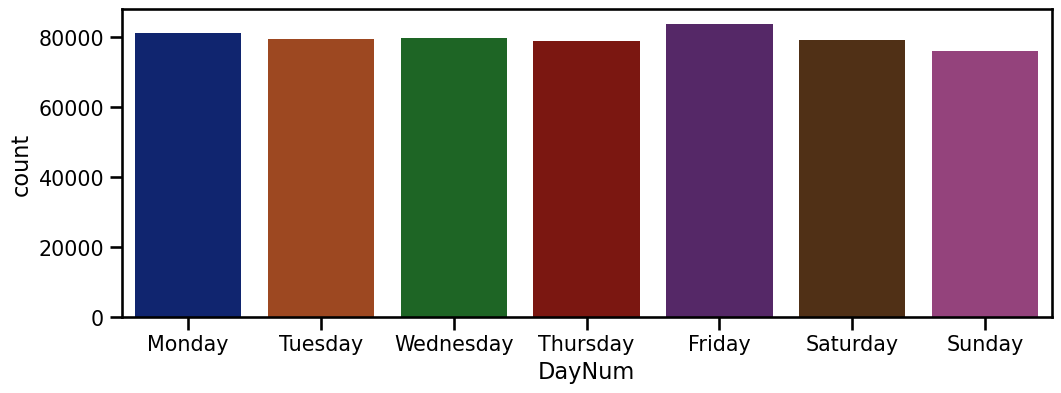

In [24]:
## plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum',palette='dark')
ax.set_xticklabels([v for k,v in day_lookup.items()]);

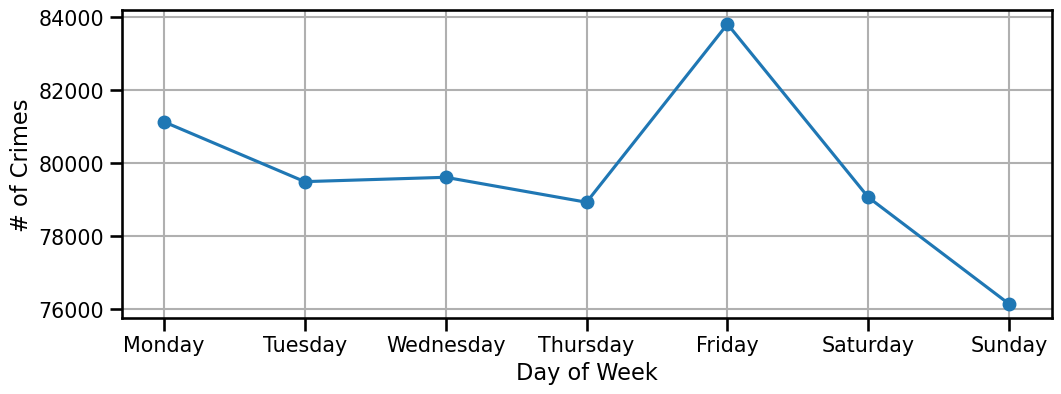

In [25]:
## save day counts
day_counts = df['DayNum'].value_counts().sort_index()
## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')

It looks like crime is highest on Fridays and lowest on Sundays.
## Weekend
Next, let's see how crime on weekend days compares with crime on weekdays:


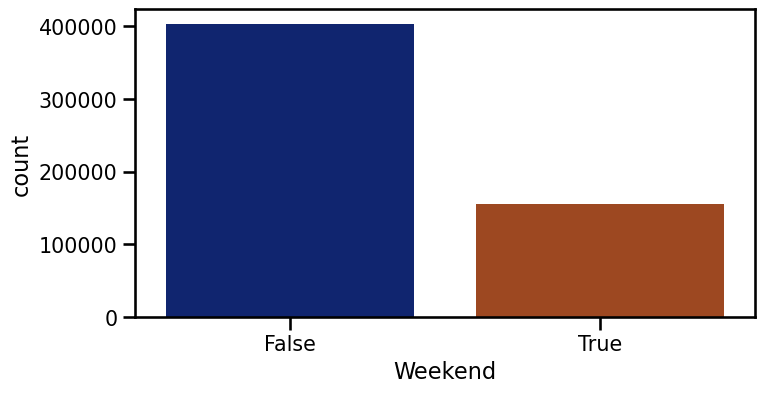

In [26]:
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

At first glance, this graph could be misleading. It looks like crime is much more common on weekdays, BUT remember there are 5 weekdays and only 2 weekend days. A better approach is to normalize this for comparison by looking at crimes per day.

In [27]:
## calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

False    80596.6
True     77600.5
Name: Weekend, dtype: float64